<font size=5  color=#003366> **[LGBIO2020] - Bioinstrumentation <br><br> 
Project EEG classification : Open your eyes! ** </font> <br><br><br>

<font size=5  color=#003366>
Prof. M. Verleysen<br>
Prof. A. Moureaux<br>

<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
<div style="text-align: right"> Version 2020 </div>
<br><br>
</font>

<font size=5 color=#009999> <b>GLOBAL CONTEXT </b> <br>
DEFINITION OF EEG CLASSIFICATION 
</font> <br> <br>

The aim of this project is to distinguish short segments of EEG signals recorded in a subject whose eyes are either closed or open along each segment. To reach this goal, you will work on a real dataset that you should have recorded by yourself during a practical session in Woluwe. You will have to pre-process the obtained dataset, extract relevant features and finally tackle the classification task. Some guidelines are given along this notebook. <b>You are allowed, and even encouraged, to skip/modify some of the proposed steps, as long as you provide some justifications. The comments/justifications that you will provide are crutial for this project! Writing code is not enough: You have to explain why you have taken your decisions.</b> <br>

In addition to this notebook, you will be asked to write a report (pdf file - max. 5 pages) documenting all the choices that you have made regarding the processing steps. you should also present and comment your main results. Do not hesitate to consult books or internet ressources. This is allowed to use them to answer the questions as long as you cite your references.


<br>

<img src="imgs/GeneralContext.jpg" width = "600">

The context of this project is illustrated in the figure above found at this [reference](https://scielo.conicyt.cl/scielo.php?script=sci_arttext&pid=S0716-97602007000500005). First, you will be asked to extract short segments of EEG waves recorded during one of the two subject conditions: eyes open or eyes closed. Based on these segments, you will extract some usefull features that will help to summarize the information content in those segments. Then, you will train a classifier to predict whether a given new segment belongs to the "eyes open" or the "eyes closed" class. You will have to predict the performances you can obtain with this classification model.

<br>


<font size=5 color=#009999> <b> STRUCTURE OF THE PROJECT </b> <br>
WHAT ARE THE MAIN STEPS?
</font> <br> <br>

The project is divided into three parts : Data Precprocessing, Feature Extraction and Classification. Those are illustrated in the figure below. 

   - In the first step, you will have to convert the entire recorded signal into segments that correspond either to the eyes closed or eyes open condition. During this phase, you will perfom basic signal processing operation to clean you data and make the classification easier. 
   - Then, based on the segments you have constructed, you will represent each of them by a concatenation of features. The idea is to decrease the dimensionality of the data to be handled easily by the classifier. They are a multitude ways of working. Be creative! 
   - Finally, you will train some classification models on your extracted features. You will have to estimate the performances obtained with the models.

<img src="imgs/blockdiagram.png" width = "800">


Note that those operations have been adressed during the three practical sessions. Do not hesitate to base this project on the code/observations you have already made during those sessions. 

<br> 


<font size=5 color=#009999> <b> INSTRUCTIONS </b> <br>
WORK BY GROUP AND DELIVERABLES
</font> <br> <br>

You can of course discuss about the project with other students, but your work has to be implemented either individually or in groups of two. You must submit on Moodle an archived folder containing:
   
   - Your notebook file with (at least) your codes and (eventually) small remarks. If it is necessary, you can join a README.txt file explaining how to run your codes. The results presented in your report should be reproducible with these codes. Make sure that we can compile them properly (for instance if you used a different toolbox than the ones provided on Moodle, you should include the associated files in your submission).
   - A pdf report of maximum 5 pages that presents your results and justifies your choices. You can write it in English or in French. This report is very important! Do not neglet the writing. It is recommended to illustrate and comment as much as possible your results (when it applies).
   
Don’t forget to mention the name(s) of the author(s) in the notebook and in the report.

<br><br>


<font size=6 color=#009999> <center><b>PART I - DATA PREPROCESSING </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>GENERAL INFORMATION </b> <br>
HOW ARE THE DATA STORED?
</font> <br> <br>

The EEG signal on which we are working have been recorded in the Wolluwe's laboratory. These signals are stored in the file <samp>EEG_data.csv</samp>. This dataset includes 32 recording channels of scalp electrodes in the following order:

$$ ch\_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'CZ', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'PZ', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2'] $$
<img src="imgs/eeg_1020.png" width = "300">

The file has a $t \times ch$ dimension, where $t$ is the number of recorded time steps and $ch$ is the number of electrodes).

The sampling rate of these recordings is 1000Hz.

In addition, the file <samp>target.csv</samp> contains a $t \times 1$ vector indicating the condition of the subject for each time step. Its entries ∈ {0, 1, NaN} correspond to:
   - 1: an eye-closed state
   - 0: an eye-open state
   - NaN: an additional unlabeled time step
   
<div class="alert alert-warning">
<b>[Question 1] Import the data and visualize them</b>  <br>
Import the signal stored in the <samp>EEG_data.csv</samp> and <samp>target.csv</samp>. As usually in a machine learning process, a simple data visualization step will help you to understand the nature of the task. You can use the <samp>ecg_plot</samp> provided in the TP1 or any other provided function. Of course, you can modify this code if you want.
</div> 

<div class="alert alert-info">
<b>[Remark] Do not display all your plots in the notebook </b>  <br>
Especially in the early stage of the project, you will produce a lot of graphs to validate what you are doing. Showing all of them in the notebook can take a huge amount of space. The, you can save them in a separate folder (in the same location as you notebook file) to look at them. This is done with the <samp>file_path</samp> argument of the visualization functions provided in previous practical sessions.
</div> 

TypeError: 'bool' object is not subscriptable

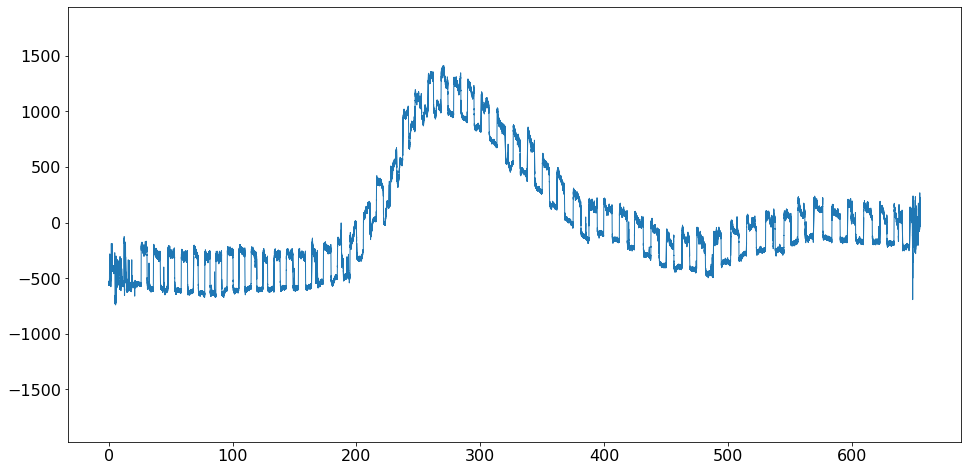

In [68]:
import pandas as pd
import numpy as np
from make_graphs import *

# -------------------------------------------------------------------------------------\
# 1. Read the data
# -------------------------------------------------------------------------------------\
    
nb_channels = 32
sf = 1000
#ch_names = [′𝐹𝑝1′,′𝐹𝑝𝑧′,′𝐹𝑝2′,′𝐹7′,′𝐹3′,′𝐹𝑧′,′𝐹4′,′𝐹8′,′𝐹𝐶5′,′𝐹𝐶1′,′𝐹𝐶2′,′𝐹𝐶6′,′𝑀1′,′𝑇7′,′𝐶3′,′𝐶𝑍′,′𝐶4′,′𝑇8′,′𝑀2′,′𝐶𝑃5′,′𝐶𝑃1′,′𝐶𝑃2′,′C𝑃6′,′𝑃7′,′𝑃3′,′𝑃𝑍′,′𝑃4′,′𝑃8′,′𝑃𝑂𝑧′,′𝑂1′,′𝑂𝑧′,′𝑂2′]
ch_names = ["Fp1","Fpz","Fp2","F7","F3","Fz","F4","F8","FC5","FC1","FC2","FC6","M1","T7","C3","CZ","C4","T8","M2","CP5","CP1","CP2","CP6","P7","P3","PZ","P4","P8","POz","O1","Oz","O2"]
data = pd.read_table('Data/EEG_data.csv', sep=",", header=None)
eeg = np.transpose(data.values)

ecg_plot(eeg, ch_names, True)

When ploting all the signals, we observe on most of them "square-shaped" saccades that are the result of the open-close eyes movements.

Remarques

<font size=5 color=#009999> <b>PREPROCESSING </b> <br>
DO YOU WANT TO CLEAN YOUR DATA?
</font> <br> <br>

Before trying to classify the different EEG segments, you may consider some pre-processing steps aiming to remove as much as possible the undesirable components in your signals. For this part, visual inspection of your signals in the time and frequency domains can be very useful. Hereunder are some suggestions that you may consider.

Some pre-processing steps are better carried out on the entire continuous data, when they are intended to remove noise affecting the whole recording. For instance:
   - you can band-pass/high-pass/low-pass filter your multi-channel EEG. Applying frequency filters before segmenting the epochs is recommended to avoid including too much border effects. The purpose of this step is to only keep the frequencies that can be relevant from a physiological point of view (you may also remove the noise induced by the power line). Which frequency range do you consider? Justify, based on the length of each epoch, data visualization, physiological reasons,....
   
   - reject some electrodes (this step can also be performed on the segmented data). You can detect, for instance by visual inspection, whether some electrodes seem to be noisy. If you remove some electrodes, give their names and justify your decisions.
   
   - perform an ICA to filter out specific noise components (if you see any). As a reminder, if $X\in \mathbb{R}^\text{n_chan} \times \text{n_time} $ denotes the EEG signals, ICA computes an estimate $A$ of the mixing matrix such that
	$$ X  = A\cdot S = \sum\limits_{i = 1}^{\text{n_sources}} A_{:i}\cdot S_{i:} $$
	 where $S$ is the matrix containing the time courses of the estimated sources (one source per row), $S_{i:}$ is its $i^{\text{th}}$ row and $A_{:i}$ the $i^{\text{th}}$ column of the mixing matrix. Therefore, it is straightforward to remove the contribution of some given sources which are supposed to reflect noise ICs by re-mixing the other ICs. Note that IC $i$ has a constant *spatial pattern* given by $A_{:i}$.
     
<div class="alert alert-warning">
<b>[Question 2] Clean your data </b>  <br>
Decide wether or not you want to preprocess you data. Explain and comment why you made this choice and why you chose a specific method among other. Provide detailed answers!
</div> 

We decided to apply a low-pass filter to get rid of the noise present on the signals. After that, we observe that we can reject some of the electrodes because the signal related to them does not present the caracteristic "square-shaped" saccades presents in most of the signals. Those are the FC5, FC1, FC2, FC6 and CZ electrodes.

In [69]:
import scipy.ndimage as im
from scipy.signal import *
import mne 

# ------ Band-pass filter ------ #

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output = 'sos')
    return sos


def butter_bandpass_filter(data, lowcut, highcut, fs, order=1):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

# -------------------------------------------------------------------------------------\
# 1. Data processing
# -------------------------------------------------------------------------------------\

(x, y) = eeg.shape
filtered_data = np.ndarray((x-5, y))
new_names = []
j = 0
for i in range(eeg.shape[0]):
    if ch_names[i] not in ["FC5","FC1","FC2","FC6","CZ"]:
        #filtered_data[i-j] = butter_bandpass_filter(eeg[i], 1, 100, sf)
        filtered_data[i-j] = eeg[i]
        new_names.append(ch_names[i])
    else:
        j = j + 1

#--------------------------

info = mne.create_info(new_names, 1000, ch_types=["eeg"] * (nb_channels-5))
raw  = mne.io.RawArray(filtered_data, info)
raw.set_montage("standard_1020", on_missing='ignore')

ICA = mne.preprocessing.ICA(method="infomax", random_state=1)
ica = ICA.fit(raw)
ica.plot_components()
ica.plot_overlay(raw)
filtered_data2 = ica.apply(raw)
#print(filtered_data2[26])
fdata = filtered_data2.get_data()

<font size=5 color=#009999> <b> CONSTRUCT YOUR TRAINING SAMPLES </b> <br>
SEGMENT THE SIGNALS INTO SHORT SEGMENTS
</font> <br> <br>

Based on the vector target, you can separate your data in segments recorded during the two different conditions (eyes closed or open). You can now take other choices : 
   -  since the subject was asked to close or open her eyes at the beginning of each segment, there should be a time lag between the beginning of each segment and the actual moment when the subject’s state change. Do you observe the state changes? Illustrate. If the state change always occurs after around $x$ seconds, you should discard the first $x$ seconds of each of your segments before trying to classify them.
   - you may remove the DC trend of each epoch.
   - reject some epochs if you think that they are too noisy, based on visual inspection in the time and/or frequency domains. Explain why it is preferable to (not) remove segments from your dataset. If you reject some segments, illustrate.
   - you can re-reference the signals. If you decide to do so, which reference do you choose? Why?
   
Do not hesitate to consider different or additional denoising techniques. Justify your choices.
   
<div class="alert alert-warning">
<b>[Question 3] Segment your data </b>  <br>
Segment the entire time signal into short segments. Each segment will constitue one training/validation/test sample of your final dataset. Justify if you decided to implement one of the propositions above.
</div> 

segmented_data = tableau d'electrodes
1 entrée du tableau d'electrodes = tableau avec 2 entrées : oeil ouvert et oeil fermé
1 de ces entrées = tableau segments

In [126]:
import matplotlib.pyplot as plt
from derive import derive
from make_graphs import ecg_plotbis

target_file = pd.read_table('Data/target.csv', sep="\n", header=None)
target = target_file[0]
l = len(target)


#plt.plot(np.linspace(0, len(target)/1000, len(target)), target)

if not("segments" in globals()):
    segments = [20576]
    for i in range(20576, 647213):
        if (target[i] != target[i+1]):
            segments.append(i+1)

#ecg_plotbis(filtered_data, True, new_names, segments)
segmented_data = []
data_to_tree = []
target_to_tree = []
for j in range(len(fdata)):
    segmented_data.append([])
    segmented_data[j].append([])
    segmented_data[j].append([])
    for i in range(len(segments)-1):
        segmented_data[j][i%2].append(fdata[j][segments[i]+1000:segments[i+1]])
        #plt.plot(fdata[j][segments[i]+1000:segments[i+1]])
        data_to_tree.append(fdata[j][segments[i]+1000:segments[i+1]])
        target_to_tree.append(i%2)
        
data_to_tree = np.array(data_to_tree)
target_to_tree = np.array(target_to_tree)
    #plt.show()
#for i in range(filtered_data.shape[0]):
#    d = derive(filtered_data[i], 1000)
#    for j in range(len(segments)-1):
#        print(np.where(d == max(d[segments[j]:segments[j]+1000]))[0][0] - segments[j])


<br><br>

<font size=6 color=#009999> <center><b>PART II - FEATURE EXTRACTION </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>GENERAL INFORMATION </b> <br>
WHAT CAN BE CONSIDERED?
</font> <br> <br>

To be able to classify your EEG segments, you must define the features on which you will apply the classification algorithms. These features should somehow summarize as best as possible the ‘useful’ information contained in an EEG segment.
   - A first idea is to keep as features all the amplitudes of the EEG signals. However, this technique may have some drawbacks. For instance, you will end up with $ch \times t$ features. How does this number compare with the number of available segments to classify? What do you think about using such features?
   - Another option is to consider the power of a relevant subset of the channels in different physiological frequency bands. In this case, you will have $n\_selected\_chan \times n\_freq$ features, where n_freq is the number of frequency bands considered. Why would such features be sound?
   
Feel free to consider different features as well. Do not forget to give and comment their definition in the report.

<div class="alert alert-info">
<b>[Remark] Look at your data </b>  <br>
It is often a good idea to try visualizing the extracted features. A first simple way to do so is to plot the mean of each feature in both classes: do you observe some differences? Was it expected, from a physiological point of view? Is it necessary to keep all the defined features? Do you identify different ‘kinds of channels’ that can both be helpful for the classification, but reflecting different physiological mechanisms? Explain which channels you consider and why.
</div>

The feature extraction may be followed by a feature selection step. You can follow the method(s) proposed during the third practical session (on classification algorithms).

<div class="alert alert-warning">
<b>[Question 4] Create your feature space </b>  <br>
Explain your methodology to create relevant features out of the segments you have obtained before.
</div> 

(If needed...) Write here your comments/observations about the code related to the Question 4 here. Main observations should be included in the report. 

In [112]:
from scipy import signal
from scipy.integrate import simps

extracted_data = []
extracted_data2 = []
extracted_target = []

for i in range(len(segmented_data)):
    for k in [0, 1]:
        for j in range(len(segmented_data[i][k])):
            freqs, psd = signal.welch(segmented_data[i][k][j], sf, nperseg = 2000)
            idx_delta = np.logical_and(freqs >= 0, freqs <= 4)
            delta = simps(psd[idx_delta], dx = freqs[1]-freqs[0])
            idx_theta = np.logical_and(freqs >= 4, freqs <= 7)
            theta = simps(psd[idx_theta], dx = freqs[1]-freqs[0])
            idx_alpha = np.logical_and(freqs >= 7, freqs <= 12)
            alpha = simps(psd[idx_alpha], dx = freqs[1]-freqs[0])
            idx_beta = np.logical_and(freqs >= 12, freqs <= 30)
            beta = simps(psd[idx_beta], dx = freqs[1]-freqs[0])
            idx_gamma = np.logical_and(freqs >= 30, freqs <= 100)
            gamma = simps(psd[idx_gamma], dx = freqs[1]-freqs[0])
            extracted_data.append([delta, theta, alpha, beta, gamma])
            extracted_data2.append([np.mean(segmented_data[i][k][j])])
            extracted_target.append(k)
extracted_target = np.array(extracted_target)

<br><br>

<font size=6 color=#009999> <center><b>PART III - CLASSIFICATION </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>GENERAL INFORMATION </b> <br>
WHAT CAN BE CONSIDERED?
</font> <br> <br>

In order to assess whether the features defined above allow to discriminate between the two conditions (eyes closed or open), you will use classification algorithms. For this task, you are advised to follow the instructions given for the third practical session. In particular, you should consider using a K-Fold cross validation to evaluate your classifiers.
You are asked to use at least two classifiers among the following ones:
   - K-nearest neighbors (kNN)
   - Decision tree
   - Neural network
   - SVM
   
<div class="alert alert-warning">
<b>[Question 5] Evalueate your classifier </b>  <br>
Report the performances obtained with your classifiers (in terms of accuracy) and give some comments. Give also the hyper-parameters of your algorithms (e.g. number of neurons for mlp, kernel for SVM) and explain how you choose them. You can compare the classification accuracies obtained using different feature sets. For instance, do you obtain better results if you perform a dimensionality reduction (e.g. using PCA) before? (Or if you only use a subset of your features?)
</div> 

(If needed...) Write here your comments/observations about the code related to the Question 5 here. Main observations should be included in the report. 

In [117]:
#------------ SVM ------------#

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Datas = scaler.fit_transform(extracted_data)
kf = KFold(n_splits = 10, shuffle = True)
scores = []
for train_index, test_index in kf.split(Datas):
    Data_train, Data_test = Datas[train_index], Datas[test_index]
    target_train = extracted_target[train_index]
    target_test = extracted_target[test_index]

    model = SVC(kernel = 'rbf', degree = 3, gamma = 'scale')

    model.fit(Data_train, target_train)

    scores.append(model.score(Data_test, target_test))
    
print(scores)
print(np.mean(scores))

[0.9389830508474576, 0.911864406779661, 0.9186440677966101, 0.9421768707482994, 0.9217687074829932, 0.9251700680272109, 0.9285714285714286, 0.935374149659864, 0.9421768707482994, 0.9047619047619048]
0.926949152542373


In [127]:
#------------ Decision tree ------------#

from sklearn.tree import DecisionTreeClassifier, plot_tree

kf = KFold(n_splits = 5, shuffle = True)
scores = []
for train_index, test_index in kf.split(data_to_tree):
    Data_train, Data_test = data_to_tree[train_index], data_to_tree[test_index]
    target_train = target_to_tree[train_index]
    target_test = target_to_tree[test_index]
clf = DecisionTreeClassifier()
clf.fit(data_to_tree, target_to_tree)
plot_tree(clf, filled = True)

ValueError: setting an array element with a sequence.